# Projet Histogram of oriented gradient

ref : https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import itertools
from scipy.ndimage.interpolation import shift

## 1 :  Preprocess the Data

We need to preprocess the image and bring down the width to height ratio to 1:2. The image size should preferably be 64 x 128. This is because we will be dividing the image into 8x8 and 16x16 patches to extract the features. Having the specified size (64 x 128) will make all our calculations pretty simple. In fact, this is the exact value used in the original paper.

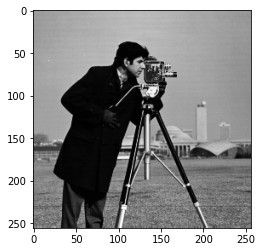

taille de l'image :  (256, 256)


In [5]:
# faut mettre votre path !!

path_base =  '..//Base_images//'
image = cv2.imread(path_base+'cameraman.tif',0) 

plt.imshow(image,'gray')
plt.show()
print("taille de l'image : ", image.shape)

In [6]:
dsize= (64,128)
image_resized = cv2.resize(image, dsize, interpolation = cv2.INTER_AREA)

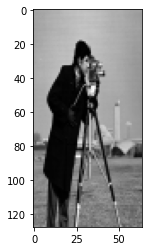

taille de l'image :  (128, 64)


In [7]:
plt.imshow(image_resized,'gray')
plt.show()
print("taille de l'image : ", image_resized.shape)

## 2 : Calculating Gradients (direction x and y)

The next step is to calculate the gradient for every pixel in the image. Gradients are the small change in the x and y directions.

To determine the gradient (or change) in the x-direction, we need to subtract the value on the left from the pixel value on the right. Similarly, to calculate the gradient in the y-direction, we will subtract the pixel value below from the pixel value above the selected pixel.

This process will give us two new matrices – one storing gradients in the x-direction and the other storing gradients in the y direction. 

In [8]:
masque = np.array([[-1,0,1]])

In [86]:
def matrice_x(img, h):
    h_rows,h_cols=h.shape
    rows,cols = img.shape
    large_img = np.zeros((rows+h_rows-1,cols+h_cols-1))
    large_img[h_rows//2:h_rows//2+rows,h_cols//2:h_cols//2+cols]=img
    out_img = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            out_img[i,j]=np.sum(large_img[i:i+h_rows,j:j+h_cols]*h)
    return out_img

In [87]:
def matrice_y(img, h):
    return matrice_x(img, h.T)

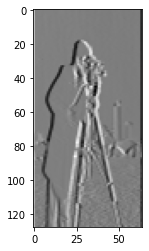

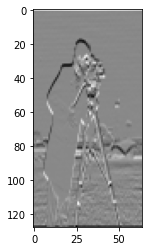

In [88]:
plt.imshow(matrice_x(image_resized, masque), 'gray')
plt.show()
plt.imshow(matrice_y(image_resized, masque), 'gray')
plt.show()

In [89]:
np.unique(matrice_x(image_resized, masque))

array([-221., -219., -187., -182., -180., -178., -177., -176., -174.,
       -173., -172., -171., -170., -169., -168., -167., -165., -164.,
       -163., -162., -161., -160., -159., -158., -157., -156., -155.,
       -154., -153., -152., -151., -150., -149., -148., -147., -146.,
       -145., -144., -143., -142., -141., -139., -138., -137., -136.,
       -135., -134., -133., -132., -131., -130., -129., -128., -127.,
       -126., -125., -124., -123., -122., -121., -120., -119., -118.,
       -117., -116., -115., -114., -113., -112., -111., -110., -109.,
       -108., -107., -106., -105., -104., -103., -102., -101., -100.,
        -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,  -91.,
        -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,  -83.,  -82.,
        -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,  -74.,  -73.,
        -72.,  -71.,  -70.,  -69.,  -68.,  -67.,  -66.,  -65.,  -64.,
        -63.,  -62.,  -61.,  -60.,  -59.,  -58.,  -57.,  -56.,  -55.,
        -54.,  -53.,

## 3 : Calculate the Magnitude and Orientation

For this step, we will be using the Pythagoras theorem (ça rappel pleins de souvenirs <3). Voir sur le site internet ça explique bien. Voici les formules : 


Total Gradient Magnitude =  √[(Gx)2+(Gy)2]

Φ = atan(Gy / Gx)

In [90]:
def magnitude_and_orientation(horizontal_gradient,vertical_gradient):
    horizontal_gradient_square = np.power(horizontal_gradient, 2)
    vertical_gradient_square = np.power(vertical_gradient, 2)
    sum_squares = horizontal_gradient_square + vertical_gradient_square
    grad_magnitude = np.sqrt(sum_squares)
    grad_direction = np.arctan(vertical_gradient/(horizontal_gradient+0.00000001))
    grad_direction = np.rad2deg(grad_direction)
    grad_direction = grad_direction%180
    return grad_magnitude, grad_direction

So now, for every pixel value, we have the total gradient (magnitude) and the orientation (direction). We need to generate the histogram using these gradients and orientations.

## 4 : Calculate Histogram of Gradients in 8×8 cells (9×1)

In [92]:
hist_bins = np.array([0,20,40,60,80,100,120,140,160])
hist = np.zeros(9)
m, o = magnitude_and_orientation(matrice_x(image_resized, masque),matrice_y(image_resized, masque))
rows,cols = image_resized.shape
for i in range(rows):
    for j in range(cols) :
        hist[int(np.floor(o[i][j]/20))] += m[i][j]

In [93]:
hist

array([74707.54177552, 25256.78785334, 14105.56345141, 12448.67467059,
       32112.18047712, 12450.02107985, 14394.34048059, 24794.46399935,
       52530.30055445])

In [94]:
(np.unique(o))

array([  0.        ,   0.34936018,   0.35150344, ..., 179.64632684,
       179.64849656, 179.65484888])